# Web Scraping for Reddit & Predicting Comments

### Scraping Thread Info from Reddit.com

In [539]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time as t

In [540]:
URL = "http://www.reddit.com"

In [553]:
# First URL of Reddit

url1 = "https://www.reddit.com"

response1 = requests.get(url1)

print(response1.status_code)

html1 = response1.text

soup1 = BeautifulSoup(html1, 'lxml')

200


In [554]:
print(soup1.html.text)

reddit: the front page of the internetr.setup({"ajax_domain": "www.reddit.com", "poisoning_canary": null, "post_site": "", "gold": false, "poisoning_report_mac": null, "requires_eu_cookie_policy": false, "nsfw_media_acknowledged": false, "stats_domain": "https://stats.redditmedia.com", "feature_onboarding_splash": "active", "cur_screen_name": "", "feature_expando_events": true, "facebook_app_id": "322647334569188", "loid": "00000000000yduvy47", "is_sponsor": false, "feature_autofill_username": null, "user_id": false, "pref_email_messages": false, "feature_new_report_flow": true, "feature_subscribe_join_follow_test": null, "logged": false, "feature_heartbeat_events": true, "ads_loading_timeout_ms": 5000, "over_18": false, "feature_ads_user_matching": false, "external_frame": false, "mweb_blacklist_expressions": ["^/prefs/?", "^/live/?", "/message/compose", "/m/", "^/subreddits/create", "^/gold", "^/advertising", "^/promoted", "^/buttons"], "feature_hover_user_ui_holdout": false, "uitrac

## Extracting title, time, subreddit, and number of comments.


In [555]:
def all_titles(soup):
    '''function pulls out titles from reddit html'''
    titles = []


    for element in soup.find_all('div', {'class':'top-matter'}):
        lin_title = element.find('p')
        if lin_title:  
            titles.append(lin_title.text)

    return titles

In [556]:
all_titles(soup)

["All of West Virginia's public schools are closed due to a teacher walk-out over pay (cnn.com)",
 'No one could have imagined... (i.redd.it)',
 'The Unabomber’s cabin, held in an FBI storage facility on an airforce base in Sacramento (i.imgur.com)',
 'In a Berlin metro. The text reads, "This text has no other purpose than to terrify those afraid of the Arabic language." (i.imgur.com)',
 'Brendan Fraser on His Comeback, Disappearance, and the Experience that Nearly Ended His Career (gq.com)',
 'You can do anything on your last day (media.giphy.com)',
 'me_irl (i.redd.it)',
 'FrontEnd VS BackEnd (i.redd.it)',
 'A sea turtle swimming up to take a nap in a giant barrel sponge (i.imgur.com)',
 'Or they’ll get shot first. (i.redd.it)',
 'Man removes feds’ spy cam, they demand it back, he refuses and sues (arstechnica.com)',
 'I had to bribe the school photographer to let me do this my senior year. (imgur.com)',
 '"The why do I have diarrhea all the time" Starter pack (i.redd.it)',
 'They to

In [557]:
def all_subreddit(soup):
    '''function pulls out subreddit from reddit html'''
    sub_reddit = []

 
    for element in soup.find_all('p', {'class':'tagline'}):
        lin = element.find('a', {'class':'subreddit hover may-blank'})
        if lin: 
            sub_reddit.append(lin.text)
    
    return sub_reddit

In [558]:
all_subreddit(soup1)

['r/pics',
 'r/aww',
 'r/news',
 'r/BlackPeopleTwitter',
 'r/OldSchoolCool',
 'r/LateStageCapitalism',
 'r/mildlyinteresting',
 'r/gaming',
 'r/gifs',
 'r/todayilearned',
 'r/BikiniBottomTwitter',
 'r/funny',
 'r/IASIP',
 'r/oddlysatisfying',
 'r/funny',
 'r/ChoosingBeggars',
 'r/funny',
 'r/funny',
 'r/wheredidthesodago',
 'r/space',
 'r/AgainstHateSubreddits',
 'r/PoliticalHumor',
 'r/videos',
 'r/StoppedWorking',
 'r/NatureIsFuckingLit']

In [559]:
def all_time(soup):
    '''function pulls out time from reddit html'''
    time = []

 
    for element in soup.find_all('p', {'class':'tagline'}):
        lin = element.find('time')
        time.append(lin.text)
    
    return time

In [560]:
all_time(soup1)

['2 hours ago',
 '3 hours ago',
 '3 hours ago',
 '3 hours ago',
 '5 hours ago',
 '5 hours ago',
 '3 hours ago',
 '4 hours ago',
 '5 hours ago',
 '6 hours ago',
 '5 hours ago',
 '3 hours ago',
 '5 hours ago',
 '3 hours ago',
 '7 hours ago',
 '2 hours ago',
 '2 hours ago',
 '4 hours ago',
 '7 hours ago',
 '6 hours ago',
 '7 hours ago',
 '6 hours ago',
 '8 hours ago',
 '6 hours ago',
 '8 hours ago']

In [561]:
def all_comment(soup):
    '''function pulls out comment from reddit html'''
    comments= []

 
    for element in soup.find_all('li', {'class':'first'}):
        lin = element.find('a')
        comments.append(lin.text)
    
    return comments

In [562]:
all_comment(soup1)

['397 comments',
 '588 comments',
 '1033 comments',
 '442 comments',
 '1039 comments',
 '536 comments',
 '283 comments',
 '425 comments',
 '1260 comments',
 '9560 comments',
 '84 comments',
 '95 comments',
 '81 comments',
 '156 comments',
 '1466 comments',
 '173 comments',
 '124 comments',
 '125 comments',
 '640 comments',
 '366 comments',
 '1625 comments',
 '390 comments',
 '3969 comments',
 '301 comments',
 '590 comments']

## Scraping Pages in Reddit

In [435]:
url = "https://www.reddit.com"

response = requests.get(url)
print(response.status_code)

html = response.text

soup = BeautifulSoup(html, 'lxml')

200


In [436]:
url = 'https://www.reddit.com'
response = requests.get(url)
print(response.status_code)
html = response.text

soup = BeautifulSoup(html, 'lxml')


element = soup.find_all('div', {'class':'nav-buttons'})
lin = element[-1].find('a')
new = lin['href']
urls.append(new)
url = new
t.sleep(8)

200


In [437]:
print(url)

https://www.reddit.com/?count=25&after=t3_7zf11n


In [563]:
def pull_pages():
    '''function pulls out urls from reddit html'''
    urls = []
    soups = []
    

    url = "https://www.reddit.com"

    for i in range(8):
    
        print(url)
        response = requests.get(url, headers={'User-agent':'AC'})
        
            #print(response.status_code)

            #if response.status_code == '200':
        html = response.text

        soup = BeautifulSoup(html, 'lxml')
        soups.append(soup)
            
        url= soup.find('div', {'class':'nav-buttons'}).find('span', {'class':'next-button'}).find('a')['href']


   

    return soups
    

In [564]:
soups1 = pull_pages()

https://www.reddit.com
https://www.reddit.com/?count=25&after=t3_7zgmgj
https://www.reddit.com/?count=50&after=t3_7zgqhj
https://www.reddit.com/?count=75&after=t3_7zfhqq
https://www.reddit.com/?count=100&after=t3_7zevlu
https://www.reddit.com/?count=125&after=t3_7zfmhw
https://www.reddit.com/?count=150&after=t3_7zfjxw
https://www.reddit.com/?count=175&after=t3_7zfmky


In [440]:
row = soup.find('div', {'class':'nav-buttons'}).find('span', {'class':'next-button'}).find('a')['href']
        #lin = row[-1].find('a')
        #url = lin['href']
urls.append(url)

In [565]:
print(urls)

['https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7jq5', 'https://www.reddit.com/?count=26&before=t3_7z8p8b', 'https://www.reddit.com/?count=25&after=t3_7z7rqy', 'https://www.reddit.com/?count=26&before=t3_7z8inv', 'https://www.reddit.com/?count=25&after=t3_7z7rqy', 'https://www.reddit.com/?count=26&before=t3_7z8inv', 'https://www.reddit.com/?count=25&after=t3_7z7rqy', 'h

In [566]:
len(soups)

8

## Parsing Title, Time, Subreddit & Comments.

Use the functions you wrote above to parse out the 4 fields - title, time, subreddit, and number of comments. Create a dataframe from the results with those 4 columns.

In [976]:
all_title = []
for i in soups:
    all_title+=(all_titles(i))

In [977]:
print(all_title)

["All of West Virginia's public schools are closed due to a teacher walk-out over pay (cnn.com)", 'The Unabomber’s cabin, held in an FBI storage facility on an airforce base in Sacramento (i.imgur.com)', 'In a Berlin metro. The text reads, "This text has no other purpose than to terrify those afraid of the Arabic language." (i.imgur.com)', 'No one could have imagined... (i.redd.it)', 'Brendan Fraser on His Comeback, Disappearance, and the Experience that Nearly Ended His Career (gq.com)', 'You can do anything on your last day (media.giphy.com)', 'me_irl (i.redd.it)', 'Or they’ll get shot first. (i.redd.it)', 'FrontEnd VS BackEnd (i.redd.it)', 'A sea turtle swimming up to take a nap in a giant barrel sponge (i.imgur.com)', 'Man removes feds’ spy cam, they demand it back, he refuses and sues (arstechnica.com)', 'I had to bribe the school photographer to let me do this my senior year. (imgur.com)', '"I hate everyone...except you." (i.imgur.com)', "This is the cleanest Saber ignition in al

In [978]:
all_sub = []
for i in soups:
    all_sub+=(all_subreddit(i))
print(all_sub)

['r/news', 'r/evilbuildings', 'r/pics', 'r/funny', 'r/movies', 'r/OSHA', 'r/meirl', 'r/PoliticalHumor', 'r/ProgrammerHumor', 'r/Damnthatsinteresting', 'r/technology', 'r/blunderyears', 'r/aww', 'r/StarWars', 'r/AbandonedPorn', 'r/starterpacks', 'r/BlackPeopleTwitter', 'r/gaming', 'r/todayilearned', 'r/photoshopbattles', 'r/lego', 'r/reactiongifs', 'r/babyelephantgifs', 'r/mildlyinteresting', 'r/PeopleFuckingDying', 'r/SequelMemes', 'r/FellowKids', 'r/CozyPlaces', 'r/interestingasfuck', 'r/EarthPorn', 'r/UpliftingNews', 'r/GetMotivated', 'r/Eyebleach', 'r/books', 'r/StrangerThings', 'r/MadeMeSmile', 'r/AskReddit', 'r/HighQualityGifs', 'r/BlueMidterm2018', 'r/HumansBeingBros', 'r/JusticeServed', 'r/rarepuppers', 'r/therewasanattempt', 'r/Futurology', 'r/Zoomies', 'r/thisismylifenow', 'r/worldnews', 'r/gifs', 'r/gamegrumps', 'r/Jokes', 'r/Simulated', 'r/AnimalsBeingBros', 'r/spacex', 'r/thecatdimension', 'r/AnimalsBeingJerks', 'r/gaming', 'r/freefolk', 'r/MEOW_IRL', 'r/television', 'r/gif

In [979]:
all_times = []
for i in soups:
    all_times+=(all_time(i))
print(all_times)

['3 hours ago', '3 hours ago', '4 hours ago', '2 hours ago', '4 hours ago', '4 hours ago', '5 hours ago', '5 hours ago', '2 hours ago', '3 hours ago', '6 hours ago', '4 hours ago', '6 hours ago', '4 hours ago', '5 hours ago', '3 hours ago', '6 hours ago', '5 hours ago', '7 hours ago', '5 hours ago', '5 hours ago', '4 hours ago', '5 hours ago', '6 hours ago', '6 hours ago', '4 hours ago', '6 hours ago', '7 hours ago', '6 hours ago', '7 hours ago', '8 hours ago', '5 hours ago', '5 hours ago', '7 hours ago', '5 hours ago', '5 hours ago', '5 hours ago', '7 hours ago', '6 hours ago', '7 hours ago', '7 hours ago', '7 hours ago', '3 hours ago', '6 hours ago', '3 hours ago', '5 hours ago', '8 hours ago', '9 hours ago', '5 hours ago', '7 hours ago', '7 hours ago', '5 hours ago', '4 hours ago', '4 hours ago', '8 hours ago', '9 hours ago', '8 hours ago', '5 hours ago', '2 hours ago', '4 hours ago', '5 hours ago', '9 hours ago', '5 hours ago', '3 hours ago', '10 hours ago', '6 hours ago', '4 hours

In [980]:
all_comments = []
for i in soups:
    all_comments+=(all_comment(i))
print(all_comments)

['1318 comments', '1072 comments', '1938 comments', '249 comments', '2268 comments', '277 comments', '241 comments', '1320 comments', '205 comments', '200 comments', '1978 comments', '226 comments', '1183 comments', '1169 comments', '392 comments', '608 comments', '623 comments', '310 comments', '2448 comments', '341 comments', '174 comments', '38 comments', '97 comments', '190 comments', '139 comments', '167 comments', '458 comments', '439 comments', '174 comments', '181 comments', '809 comments', '391 comments', '173 comments', '1029 comments', '117 comments', '52 comments', '10515 comments', '409 comments', '398 comments', '225 comments', '284 comments', '208 comments', '52 comments', '157 comments', '56 comments', '37 comments', '2247 comments', '716 comments', '96 comments', '300 comments', '318 comments', '96 comments', '455 comments', '30 comments', '165 comments', '736 comments', '108 comments', '51 comments', '59 comments', '71 comments', '41 comments', '177 comments', '38 com

# Creating a DataFrame

In [982]:
column_names=['Titles','Subreddit','Time', 'Comments']
df=pd.DataFrame(columns=column_names)
df['Titles']=all_title
df['Subreddit']=all_sub
df['Time']=all_times
df['Comments']=all_comments
df

Titles  \
0    All of West Virginia's public schools are clos...   
1    The Unabomber’s cabin, held in an FBI storage ...   
2    In a Berlin metro. The text reads, "This text ...   
3            No one could have imagined... (i.redd.it)   
4    Brendan Fraser on His Comeback, Disappearance,...   
5    You can do anything on your last day (media.gi...   
6                                   me_irl (i.redd.it)   
7               Or they’ll get shot first. (i.redd.it)   
8                      FrontEnd VS BackEnd (i.redd.it)   
9    A sea turtle swimming up to take a nap in a gi...   
10   Man removes feds’ spy cam, they demand it back...   
11   I had to bribe the school photographer to let ...   
12       "I hate everyone...except you." (i.imgur.com)   
13   This is the cleanest Saber ignition in all of ...   
14   Abandoned beach house in the Outer Banks, Nort...   
15   "The why do I have diarrhea all the time" Star...   
16   The hero we need, but not the hero we deserve....   
17   They told me Cuphead was difficult, but this i...   
18   TIL Bhutan is the world's only carbon negative...   
19         PsBattle: Picasso holding a gun (i.redd.it)   
20   I'm not a good LEGO-ist but I'm proud of my li...   
21   When the customer demands to speak to your man...   
22   They play just like humans. Pure joy. (gfycat....   
23   Layers of paint on an NYC subway pillar (i.red...   
24   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...   
25                 Running a Solo business (i.redd.it)   
26   I don't think that's how that meme works... (i...   
27   The mouse hole we put in the wall when we gutt...   
28                 Spray paint spirograph (gfycat.com)   
29   The sky before sunset at Tre Cime di Lavaredo ...   
..                                                 ...   
170                       Grown-up Azula (i.imgur.com)   
171  There was an attempt to breach a building (med...   
172  Made some trophies for my Beerio Kart tourney ...   
173    Hi Five For You! Hi Five For You! (i.imgur.com)   
174           Hawa Mahal (Palace of Winds) (i.redd.it)   
175                 Gas companies HATE him (i.redd.it)   
176          MCL33 spotted in airport? (img.imgur.com)   
177  My wedding ring in the tuft of the ottoman (i....   
178  Stubborn boss: If they won’t listen to you, ki...   
179  My puppy and my baby girl fight over who's goi...   
180  Liberals should just buy guns en masse and tal...   
181  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...   
182    $24K Stolen by Kraken.com (self.CryptoCurrency)   
183      When you are a libtard epic style (i.redd.it)   
184  Snake River Farms, Wagyu Strip [3,036 x 4,048]...   
185                     Anon gets grounded (i.redd.it)   
186  Official Netflix poster for "Annihilation" dir...   
187             A Newspaper Police Blotter (i.redd.it)   
188  Here's why you look left and right before cros...   
189                              anime_irl (i.redd.it)   
190  "Fuck you, Alt-Right! Watch as I drink your pr...   
191  Murder charge filed after nurses seen on camer...   
192  Maddie Rooney's Wikipedia Page Shortly After W...   
193  The Deathbed Fallacy: Why People's Deathbed Re...   
194  this superbowl took a break from getting beat ...   
195  I guess this is technically not an off-brand, ...   
196  Population density of Egypt [750 x 1334] (i.re...   
197  Nixon shares his signature one more time. (i.r...   
198      Borkius, flail master of the west (i.redd.it)   
199  Welcome to r/ANormalDayInRussia, I’ll be your ...   

                   Subreddit          Time       Comments  
0                     r/news   3 hours ago  1318 comments  
1            r/evilbuildings   3 hours ago  1072 comments  
2                     r/pics   4 hours ago  1938 comments  
3                    r/funny   2 hours ago   249 comments  
4                   r/movies   4 hours ago  2268 comments  
5                     r/OSHA   4 hours ago   277 comments  
6                    r/meirl   

# Cleaning up the Data

In [983]:
df['Comments']=df['Comments'].astype(str).str.replace('comments','')
df['Comments']= pd.to_numeric(df['Comments'])
df

Titles  \
0    All of West Virginia's public schools are clos...   
1    The Unabomber’s cabin, held in an FBI storage ...   
2    In a Berlin metro. The text reads, "This text ...   
3            No one could have imagined... (i.redd.it)   
4    Brendan Fraser on His Comeback, Disappearance,...   
5    You can do anything on your last day (media.gi...   
6                                   me_irl (i.redd.it)   
7               Or they’ll get shot first. (i.redd.it)   
8                      FrontEnd VS BackEnd (i.redd.it)   
9    A sea turtle swimming up to take a nap in a gi...   
10   Man removes feds’ spy cam, they demand it back...   
11   I had to bribe the school photographer to let ...   
12       "I hate everyone...except you." (i.imgur.com)   
13   This is the cleanest Saber ignition in all of ...   
14   Abandoned beach house in the Outer Banks, Nort...   
15   "The why do I have diarrhea all the time" Star...   
16   The hero we need, but not the hero we deserve....   
17   They told me Cuphead was difficult, but this i...   
18   TIL Bhutan is the world's only carbon negative...   
19         PsBattle: Picasso holding a gun (i.redd.it)   
20   I'm not a good LEGO-ist but I'm proud of my li...   
21   When the customer demands to speak to your man...   
22   They play just like humans. Pure joy. (gfycat....   
23   Layers of paint on an NYC subway pillar (i.red...   
24   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...   
25                 Running a Solo business (i.redd.it)   
26   I don't think that's how that meme works... (i...   
27   The mouse hole we put in the wall when we gutt...   
28                 Spray paint spirograph (gfycat.com)   
29   The sky before sunset at Tre Cime di Lavaredo ...   
..                                                 ...   
170                       Grown-up Azula (i.imgur.com)   
171  There was an attempt to breach a building (med...   
172  Made some trophies for my Beerio Kart tourney ...   
173    Hi Five For You! Hi Five For You! (i.imgur.com)   
174           Hawa Mahal (Palace of Winds) (i.redd.it)   
175                 Gas companies HATE him (i.redd.it)   
176          MCL33 spotted in airport? (img.imgur.com)   
177  My wedding ring in the tuft of the ottoman (i....   
178  Stubborn boss: If they won’t listen to you, ki...   
179  My puppy and my baby girl fight over who's goi...   
180  Liberals should just buy guns en masse and tal...   
181  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...   
182    $24K Stolen by Kraken.com (self.CryptoCurrency)   
183      When you are a libtard epic style (i.redd.it)   
184  Snake River Farms, Wagyu Strip [3,036 x 4,048]...   
185                     Anon gets grounded (i.redd.it)   
186  Official Netflix poster for "Annihilation" dir...   
187             A Newspaper Police Blotter (i.redd.it)   
188  Here's why you look left and right before cros...   
189                              anime_irl (i.redd.it)   
190  "Fuck you, Alt-Right! Watch as I drink your pr...   
191  Murder charge filed after nurses seen on camer...   
192  Maddie Rooney's Wikipedia Page Shortly After W...   
193  The Deathbed Fallacy: Why People's Deathbed Re...   
194  this superbowl took a break from getting beat ...   
195  I guess this is technically not an off-brand, ...   
196  Population density of Egypt [750 x 1334] (i.re...   
197  Nixon shares his signature one more time. (i.r...   
198      Borkius, flail master of the west (i.redd.it)   
199  Welcome to r/ANormalDayInRussia, I’ll be your ...   

                   Subreddit          Time  Comments  
0                     r/news   3 hours ago      1318  
1            r/evilbuildings   3 hours ago      1072  
2                     r/pics   4 hours ago      1938  
3                    r/funny   2 hours ago       249  
4                   r/movies   4 hours ago      2268  
5                     r/OSHA   4 hours ago       277  
6                    r/meirl   5 hours ago       241  
7          

In [ ]:
#df['Comments']=df['Comments'].apply(lambda x: x.replace('comments',''))
#df['Comments']= pd.to_numeric(df['Comments'])



In [984]:
df['Subreddit']=df['Subreddit'].apply(lambda x: x.replace('r/',''))
df

Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
2    In a Berlin metro. The text reads, "This text ...                   pics   
3            No one could have imagined... (i.redd.it)                  funny   
4    Brendan Fraser on His Comeback, Disappearance,...                 movies   
5    You can do anything on your last day (media.gi...                   OSHA   
6                                   me_irl (i.redd.it)                  meirl   
7               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
8                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
9    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
10   Man removes feds’ spy cam, they demand it back...             technology   
11   I had to bribe the school photographer to let ...           blunderyears   
12       "I hate everyone...except you." (i.imgur.com)                    aww   
13   This is the cleanest Saber ignition in all of ...               StarWars   
14   Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
15   "The why do I have diarrhea all the time" Star...           starterpacks   
16   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
17   They told me Cuphead was difficult, but this i...                 gaming   
18   TIL Bhutan is the world's only carbon negative...          todayilearned   
19         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
20   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
21   When the customer demands to speak to your man...           reactiongifs   
22   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
23   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
24   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
25                 Running a Solo business (i.redd.it)            SequelMemes   
26   I don't think that's how that meme works... (i...             FellowKids   
27   The mouse hole we put in the wall when we gutt...             CozyPlaces   
28                 Spray paint spirograph (gfycat.com)      interestingasfuck   
29   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
..                                                 ...                    ...   
170                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
171  There was an attempt to breach a building (med...                 gaming   
172  Made some trophies for my Beerio Kart tourney ...                 gaming   
173    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
174           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
175                 Gas companies HATE him (i.redd.it)                  funny   
176          MCL33 spotted in airport? (img.imgur.com)               formula1   
177  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
178  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
179  My puppy and my baby girl fight over who's goi...                    aww   
180  Liberals should just buy guns en masse and tal...             CrazyIdeas   
181  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
182    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
183      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
184  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
185                     Anon gets grounded (i.redd.it)              greentext   
186  Official Netflix poster for "Annihilation" dir...                 movies   
187             A Newspaper Police Blotter (i.redd.it)                  funny  

In [ ]:
#df['Time'] = [item.replace('hours ago','') for item in df['Time']]

In [517]:
df.Time.iloc[153]

'1 hour ago'

In [985]:
df['Time']=df['Time'].apply(lambda x: x.replace('hours ago',''))
df['Time']=df['Time'].apply(lambda x: x.replace('hour ago',''))
df


Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
2    In a Berlin metro. The text reads, "This text ...                   pics   
3            No one could have imagined... (i.redd.it)                  funny   
4    Brendan Fraser on His Comeback, Disappearance,...                 movies   
5    You can do anything on your last day (media.gi...                   OSHA   
6                                   me_irl (i.redd.it)                  meirl   
7               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
8                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
9    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
10   Man removes feds’ spy cam, they demand it back...             technology   
11   I had to bribe the school photographer to let ...           blunderyears   
12       "I hate everyone...except you." (i.imgur.com)                    aww   
13   This is the cleanest Saber ignition in all of ...               StarWars   
14   Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
15   "The why do I have diarrhea all the time" Star...           starterpacks   
16   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
17   They told me Cuphead was difficult, but this i...                 gaming   
18   TIL Bhutan is the world's only carbon negative...          todayilearned   
19         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
20   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
21   When the customer demands to speak to your man...           reactiongifs   
22   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
23   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
24   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
25                 Running a Solo business (i.redd.it)            SequelMemes   
26   I don't think that's how that meme works... (i...             FellowKids   
27   The mouse hole we put in the wall when we gutt...             CozyPlaces   
28                 Spray paint spirograph (gfycat.com)      interestingasfuck   
29   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
..                                                 ...                    ...   
170                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
171  There was an attempt to breach a building (med...                 gaming   
172  Made some trophies for my Beerio Kart tourney ...                 gaming   
173    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
174           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
175                 Gas companies HATE him (i.redd.it)                  funny   
176          MCL33 spotted in airport? (img.imgur.com)               formula1   
177  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
178  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
179  My puppy and my baby girl fight over who's goi...                    aww   
180  Liberals should just buy guns en masse and tal...             CrazyIdeas   
181  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
182    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
183      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
184  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
185                     Anon gets grounded (i.redd.it)              greentext   
186  Official Netflix poster for "Annihilation" dir...                 movies   
187             A Newspaper Police Blotter (i.redd.it)                  funny  

In [986]:
df = df[df.Time != df.Time.iloc[100]]
df = df[df.Time != df.Time.iloc[153]]



In [987]:
df['Time']= pd.to_numeric(df['Time'])
df['Time']= pd.to_numeric(df['Time'])
df

Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
3            No one could have imagined... (i.redd.it)                  funny   
6                                   me_irl (i.redd.it)                  meirl   
7               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
8                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
9    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
10   Man removes feds’ spy cam, they demand it back...             technology   
12       "I hate everyone...except you." (i.imgur.com)                    aww   
14   Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
15   "The why do I have diarrhea all the time" Star...           starterpacks   
16   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
17   They told me Cuphead was difficult, but this i...                 gaming   
18   TIL Bhutan is the world's only carbon negative...          todayilearned   
19         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
20   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
22   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
23   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
24   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
26   I don't think that's how that meme works... (i...             FellowKids   
27   The mouse hole we put in the wall when we gutt...             CozyPlaces   
28                 Spray paint spirograph (gfycat.com)      interestingasfuck   
29   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
30   Woman finds her corgi comforting grieving stra...          UpliftingNews   
31   [IMAGE] "Worry Is a Total Waste of Time" (i.im...           GetMotivated   
32   Clay turtle I made for my fiancé, who has been...              Eyebleach   
33   Libraries are tossing millions of books to mak...                  books   
34                 Seen in Warsaw, Poland! (i.redd.it)         StrangerThings   
35                 Flick loves his bunny (i.imgur.com)            MadeMeSmile   
36   What "I know it sounds weird, but just try it"...              AskReddit   
..                                                 ...                    ...   
170                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
171  There was an attempt to breach a building (med...                 gaming   
172  Made some trophies for my Beerio Kart tourney ...                 gaming   
173    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
174           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
175                 Gas companies HATE him (i.redd.it)                  funny   
176          MCL33 spotted in airport? (img.imgur.com)               formula1   
177  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
178  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
179  My puppy and my baby girl fight over who's goi...                    aww   
180  Liberals should just buy guns en masse and tal...             CrazyIdeas   
181  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
182    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
183      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
184  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
185                     Anon gets grounded (i.redd.it)              greentext   
186  Official Netflix poster for "Annihilation" dir...                 movies   
187             A Newspaper Police Blotter (i.redd.it)                  funny  

In [988]:
df.dtypes

Titles       object
Subreddit    object
Time          int64
Comments      int64
dtype: object

### Saving as a CSV

In [989]:
# Export to csv
df.to_csv('./reddit_data', index=False)

## Predicting comments using Random Forests + Another Classifier

In [1373]:
df = pd.read_csv('./reddit_data')
df

Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
2            No one could have imagined... (i.redd.it)                  funny   
3                                   me_irl (i.redd.it)                  meirl   
4               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
5                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
6    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
7    Man removes feds’ spy cam, they demand it back...             technology   
8        "I hate everyone...except you." (i.imgur.com)                    aww   
9    Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
10   "The why do I have diarrhea all the time" Star...           starterpacks   
11   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
12   They told me Cuphead was difficult, but this i...                 gaming   
13   TIL Bhutan is the world's only carbon negative...          todayilearned   
14         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
15   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
16   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
17   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
18   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
19   I don't think that's how that meme works... (i...             FellowKids   
20   The mouse hole we put in the wall when we gutt...             CozyPlaces   
21                 Spray paint spirograph (gfycat.com)      interestingasfuck   
22   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
23   Woman finds her corgi comforting grieving stra...          UpliftingNews   
24   [IMAGE] "Worry Is a Total Waste of Time" (i.im...           GetMotivated   
25   Clay turtle I made for my fiancé, who has been...              Eyebleach   
26   Libraries are tossing millions of books to mak...                  books   
27                 Seen in Warsaw, Poland! (i.redd.it)         StrangerThings   
28                 Flick loves his bunny (i.imgur.com)            MadeMeSmile   
29   What "I know it sounds weird, but just try it"...              AskReddit   
..                                                 ...                    ...   
142                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
143  There was an attempt to breach a building (med...                 gaming   
144  Made some trophies for my Beerio Kart tourney ...                 gaming   
145    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
146           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
147                 Gas companies HATE him (i.redd.it)                  funny   
148          MCL33 spotted in airport? (img.imgur.com)               formula1   
149  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
150  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
151  My puppy and my baby girl fight over who's goi...                    aww   
152  Liberals should just buy guns en masse and tal...             CrazyIdeas   
153  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
154    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
155      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
156  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
157                     Anon gets grounded (i.redd.it)              greentext   
158  Official Netflix poster for "Annihilation" dir...                 movies   
159             A Newspaper Police Blotter (i.redd.it)                  funny  

In [1374]:
df['Comments'].median()

141.5

In [1375]:
df['median'] = df['Comments'].apply(lambda x: 1 if x>141.5 else 0)
df

Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
2            No one could have imagined... (i.redd.it)                  funny   
3                                   me_irl (i.redd.it)                  meirl   
4               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
5                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
6    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
7    Man removes feds’ spy cam, they demand it back...             technology   
8        "I hate everyone...except you." (i.imgur.com)                    aww   
9    Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
10   "The why do I have diarrhea all the time" Star...           starterpacks   
11   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
12   They told me Cuphead was difficult, but this i...                 gaming   
13   TIL Bhutan is the world's only carbon negative...          todayilearned   
14         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
15   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
16   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
17   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
18   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
19   I don't think that's how that meme works... (i...             FellowKids   
20   The mouse hole we put in the wall when we gutt...             CozyPlaces   
21                 Spray paint spirograph (gfycat.com)      interestingasfuck   
22   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
23   Woman finds her corgi comforting grieving stra...          UpliftingNews   
24   [IMAGE] "Worry Is a Total Waste of Time" (i.im...           GetMotivated   
25   Clay turtle I made for my fiancé, who has been...              Eyebleach   
26   Libraries are tossing millions of books to mak...                  books   
27                 Seen in Warsaw, Poland! (i.redd.it)         StrangerThings   
28                 Flick loves his bunny (i.imgur.com)            MadeMeSmile   
29   What "I know it sounds weird, but just try it"...              AskReddit   
..                                                 ...                    ...   
142                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
143  There was an attempt to breach a building (med...                 gaming   
144  Made some trophies for my Beerio Kart tourney ...                 gaming   
145    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
146           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
147                 Gas companies HATE him (i.redd.it)                  funny   
148          MCL33 spotted in airport? (img.imgur.com)               formula1   
149  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
150  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
151  My puppy and my baby girl fight over who's goi...                    aww   
152  Liberals should just buy guns en masse and tal...             CrazyIdeas   
153  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
154    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
155      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
156  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
157                     Anon gets grounded (i.redd.it)              greentext   
158  Official Netflix poster for "Annihilation" dir...                 movies   
159             A Newspaper Police Blotter (i.redd.it)                  funny  

df['median'].value_counts()
#they are split exactly even so baseline is 86 baseline = 50%

#### Creating a Random Forest model to predict High/Low number of comments using Sklearn. 

In [1377]:
df_2 = pd.get_dummies(df.Subreddit)
df_2

2healthbars  2meirl4meirl  ANormalDayInRussia  AbandonedPorn  \
0              0             0                   0              0   
1              0             0                   0              0   
2              0             0                   0              0   
3              0             0                   0              0   
4              0             0                   0              0   
5              0             0                   0              0   
6              0             0                   0              0   
7              0             0                   0              0   
8              0             0                   0              0   
9              0             0                   0              1   
10             0             0                   0              0   
11             0             0                   0              0   
12             0             0                   0              0   
13             0             0                   0              0   
14             0             0                   0              0   
15             0             0                   0              0   
16             0             0                   0              0   
17             0             0                   0              0   
18             0             0                   0              0   
19             0             0                   0              0   
20             0             0                   0              0   
21             0             0                   0              0   
22             0             0                   0              0   
23             0             0                   0              0   
24             0             0                   0              0   
25             0             0                   0              0   
26             0             0                   0              0   
27             0             0                   0              0   
28             0             0                   0              0   
29             0             0                   0              0   
..           ...           ...                 ...            ...   
142            0             0                   0              0   
143            0             0                   0              0   
144            0             0                   0              0   
145            0             0                   0              0   
146            0             0                   0              0   
147            0             0                   0              0   
148            0             0                   0              0   
149            0             0                   0              0   
150            0             0                   0              0   
151            0             0                   0              0   
152            0             0                   0              0   
153            0             0                   0              0   
154            0             0                   0              0   
155            0             0                   0              0   
156            0             0                   0              0   
157            0             0                   0              0   
158            0             0                   0              0   
159            0             0                   0              0   
160            0             0                   0              0   
161            0             0                   0              0   
162            0             0                   0              0   
163            0             0                   0              0   
164            0             0                   0              0   
165            0             0                   0              0   
166            0             0                   0              0   
167            0             0                   0              0   
168

In [1378]:
sub_data = pd.concat([df,df_2], axis=1)
sub_data

Titles              Subreddit  \
0    All of West Virginia's public schools are clos...                   news   
1    The Unabomber’s cabin, held in an FBI storage ...          evilbuildings   
2            No one could have imagined... (i.redd.it)                  funny   
3                                   me_irl (i.redd.it)                  meirl   
4               Or they’ll get shot first. (i.redd.it)         PoliticalHumor   
5                      FrontEnd VS BackEnd (i.redd.it)        ProgrammerHumor   
6    A sea turtle swimming up to take a nap in a gi...   Damnthatsinteresting   
7    Man removes feds’ spy cam, they demand it back...             technology   
8        "I hate everyone...except you." (i.imgur.com)                    aww   
9    Abandoned beach house in the Outer Banks, Nort...          AbandonedPorn   
10   "The why do I have diarrhea all the time" Star...           starterpacks   
11   The hero we need, but not the hero we deserve....     BlackPeopleTwitter   
12   They told me Cuphead was difficult, but this i...                 gaming   
13   TIL Bhutan is the world's only carbon negative...          todayilearned   
14         PsBattle: Picasso holding a gun (i.redd.it)       photoshopbattles   
15   I'm not a good LEGO-ist but I'm proud of my li...                   lego   
16   They play just like humans. Pure joy. (gfycat....       babyelephantgifs   
17   Layers of paint on an NYC subway pillar (i.red...      mildlyinteresting   
18   RaF pIlOt TrIeS tO tAkE oFf FrOm BeHiNd EnEmY ...     PeopleFuckingDying   
19   I don't think that's how that meme works... (i...             FellowKids   
20   The mouse hole we put in the wall when we gutt...             CozyPlaces   
21                 Spray paint spirograph (gfycat.com)      interestingasfuck   
22   The sky before sunset at Tre Cime di Lavaredo ...              EarthPorn   
23   Woman finds her corgi comforting grieving stra...          UpliftingNews   
24   [IMAGE] "Worry Is a Total Waste of Time" (i.im...           GetMotivated   
25   Clay turtle I made for my fiancé, who has been...              Eyebleach   
26   Libraries are tossing millions of books to mak...                  books   
27                 Seen in Warsaw, Poland! (i.redd.it)         StrangerThings   
28                 Flick loves his bunny (i.imgur.com)            MadeMeSmile   
29   What "I know it sounds weird, but just try it"...              AskReddit   
..                                                 ...                    ...   
142                       Grown-up Azula (i.imgur.com)       TheLastAirbender   
143  There was an attempt to breach a building (med...                 gaming   
144  Made some trophies for my Beerio Kart tourney ...                 gaming   
145    Hi Five For You! Hi Five For You! (i.imgur.com)                   gifs   
146           Hawa Mahal (Palace of Winds) (i.redd.it)  AccidentalWesAnderson   
147                 Gas companies HATE him (i.redd.it)                  funny   
148          MCL33 spotted in airport? (img.imgur.com)               formula1   
149  My wedding ring in the tuft of the ottoman (i....             Perfectfit   
150  Stubborn boss: If they won’t listen to you, ki...    MaliciousCompliance   
151  My puppy and my baby girl fight over who's goi...                    aww   
152  Liberals should just buy guns en masse and tal...             CrazyIdeas   
153  [NO SPOILERS] Margaery Tyrell by Alice Zhang (...          gameofthrones   
154    $24K Stolen by Kraken.com (self.CryptoCurrency)         CryptoCurrency   
155      When you are a libtard epic style (i.redd.it)         ComedyCemetery   
156  Snake River Farms, Wagyu Strip [3,036 x 4,048]...               FoodPorn   
157                     Anon gets grounded (i.redd.it)              greentext   
158  Official Netflix poster for "Annihilation" dir...                 movies   
159             A Newspaper Police Blotter (i.redd.it)                  funny  

In [1379]:
Tree_1= sub_data.drop(['Titles','Time','Comments', 'Subreddit'], axis=1)
pd.set_option("display.max_columns", 999)
Tree_1

median  2healthbars  2meirl4meirl  ANormalDayInRussia  AbandonedPorn  \
0         1            0             0                   0              0   
1         1            0             0                   0              0   
2         1            0             0                   0              0   
3         1            0             0                   0              0   
4         1            0             0                   0              0   
5         1            0             0                   0              0   
6         1            0             0                   0              0   
7         1            0             0                   0              0   
8         1            0             0                   0              0   
9         1            0             0                   0              1   
10        1            0             0                   0              0   
11        1            0             0                   0              0   
12        1            0             0                   0              0   
13        1            0             0                   0              0   
14        1            0             0                   0              0   
15        1            0             0                   0              0   
16        0            0             0                   0              0   
17        1            0             0                   0              0   
18        0            0             0                   0              0   
19        1            0             0                   0              0   
20        1            0             0                   0              0   
21        1            0             0                   0              0   
22        1            0             0                   0              0   
23        1            0             0                   0              0   
24        1            0             0                   0              0   
25        1            0             0                   0              0   
26        1            0             0                   0              0   
27        0            0             0                   0              0   
28        0            0             0                   0              0   
29        1            0             0                   0              0   
..      ...          ...           ...                 ...            ...   
142       0            0             0                   0              0   
143       0            0             0                   0              0   
144       1            0             0                   0              0   
145       0            0             0                   0              0   
146       0            0             0                   0              0   
147       0            0             0                   0              0   
148       1            0             0                   0              0   
149       0            0             0                   0              0   
150       0            0             0                   0              0   
151       1            0             0                   0              0   
152       1            0             0                   0              0   
153       0            0             0                   0              0   
154       1            0             0                   0              0   
155       1            0             0                   0              0   
156       0            0             0                   0              0   
157       0            0             0                   0              0   
158       1            0             0                   0              0   
159       0            0             0                   0              0   
160       1            0             0                   0              0   
161       0            0             0                   0              0   
1

In [1380]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=41)

In [ ]:
'''Setting up a random forest model using only the words in subreddits as a 
feature to determine if they affect number of comments'''

In [1505]:
X = Tree_1.drop(['median'], axis=1)
y = Tree_1['median']

In [1506]:
y.astype(int)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     1
      ..
142    0
143    0
144    1
145    0
146    0
147    0
148    1
149    0
150    0
151    1
152    1
153    0
154    1
155    1
156    0
157    0
158    1
159    0
160    1
161    0
162    1
163    1
164    0
165    0
166    0
167    0
168    1
169    0
170    0
171    0
Name: median, Length: 172, dtype: int64

In [1507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [1465]:
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1504]:
rf = RandomForestClassifier()
rf.fit(X_train_s,y_train)
scores = cross_val_score(rf, X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf.score(X_test_s, y_test))

0.6173337502605795
0.46153846153846156


In [1467]:
zipped = list(zip(X_train, rf.feature_importances_))

In [1468]:
from operator import itemgetter

In [1469]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

In [1508]:
sorted_imp

word  importance
0                 funny    0.037728
1                gaming    0.034069
2                  news    0.031375
3                sports    0.021567
4             worldnews    0.021018
5                 PandR    0.018033
6          PrequelMemes    0.016604
7              RoomPorn    0.016295
8      AnimalsBeingBros    0.014718
9            television    0.014398
10               movies    0.014277
11             nononono    0.013525
12             NotMyJob    0.013181
13     photoshopbattles    0.013053
14       CryptoCurrency    0.012896
15      HumansBeingBros    0.012866
16                  aww    0.012812
17      MurderedByWords    0.012511
18         GetMotivated    0.012354
19        CringeAnarchy    0.012292
20      oddlysatisfying    0.012130
21             nintendo    0.012062
22     ColorizedHistory    0.012058
23                 pics    0.012037
24              science    0.011892
25        AbandonedPorn    0.011756
26           technology    0.011694
27              MapPorn    0.011665
28    mildlyinteresting    0.011649
29          MemeEconomy    0.011486
..                  ...         ...
96       wallstreetbets    0.004964
97      thisismylifenow    0.004901
98            AskReddit    0.000000
99   BlackPeopleTwitter    0.000000
100           Bossfight    0.000000
101          CozyPlaces    0.000000
102          CrazyIdeas    0.000000
103           EarthPorn    0.000000
104            MEOW_IRL    0.000000
105           Simulated    0.000000
106              Tinder    0.000000
107       assholedesign    0.000000
108       beetlejuicing    0.000000
109               books    0.000000
110        changemyview    0.000000
111     crappyoffbrands    0.000000
112         dogpictures    0.000000
113              europe    0.000000
114       evilbuildings    0.000000
115     forbiddensnacks    0.000000
116           greentext    0.000000
117                lego    0.000000
118               meirl    0.000000
119          polandball    0.000000
120    powerwashingporn    0.000000
121         rarepuppers    0.000000
122        starterpacks    0.000000
123       todayilearned    0.000000
124              videos    0.000000
125      wholesomememes    0.000000

[126 rows x 2 columns]

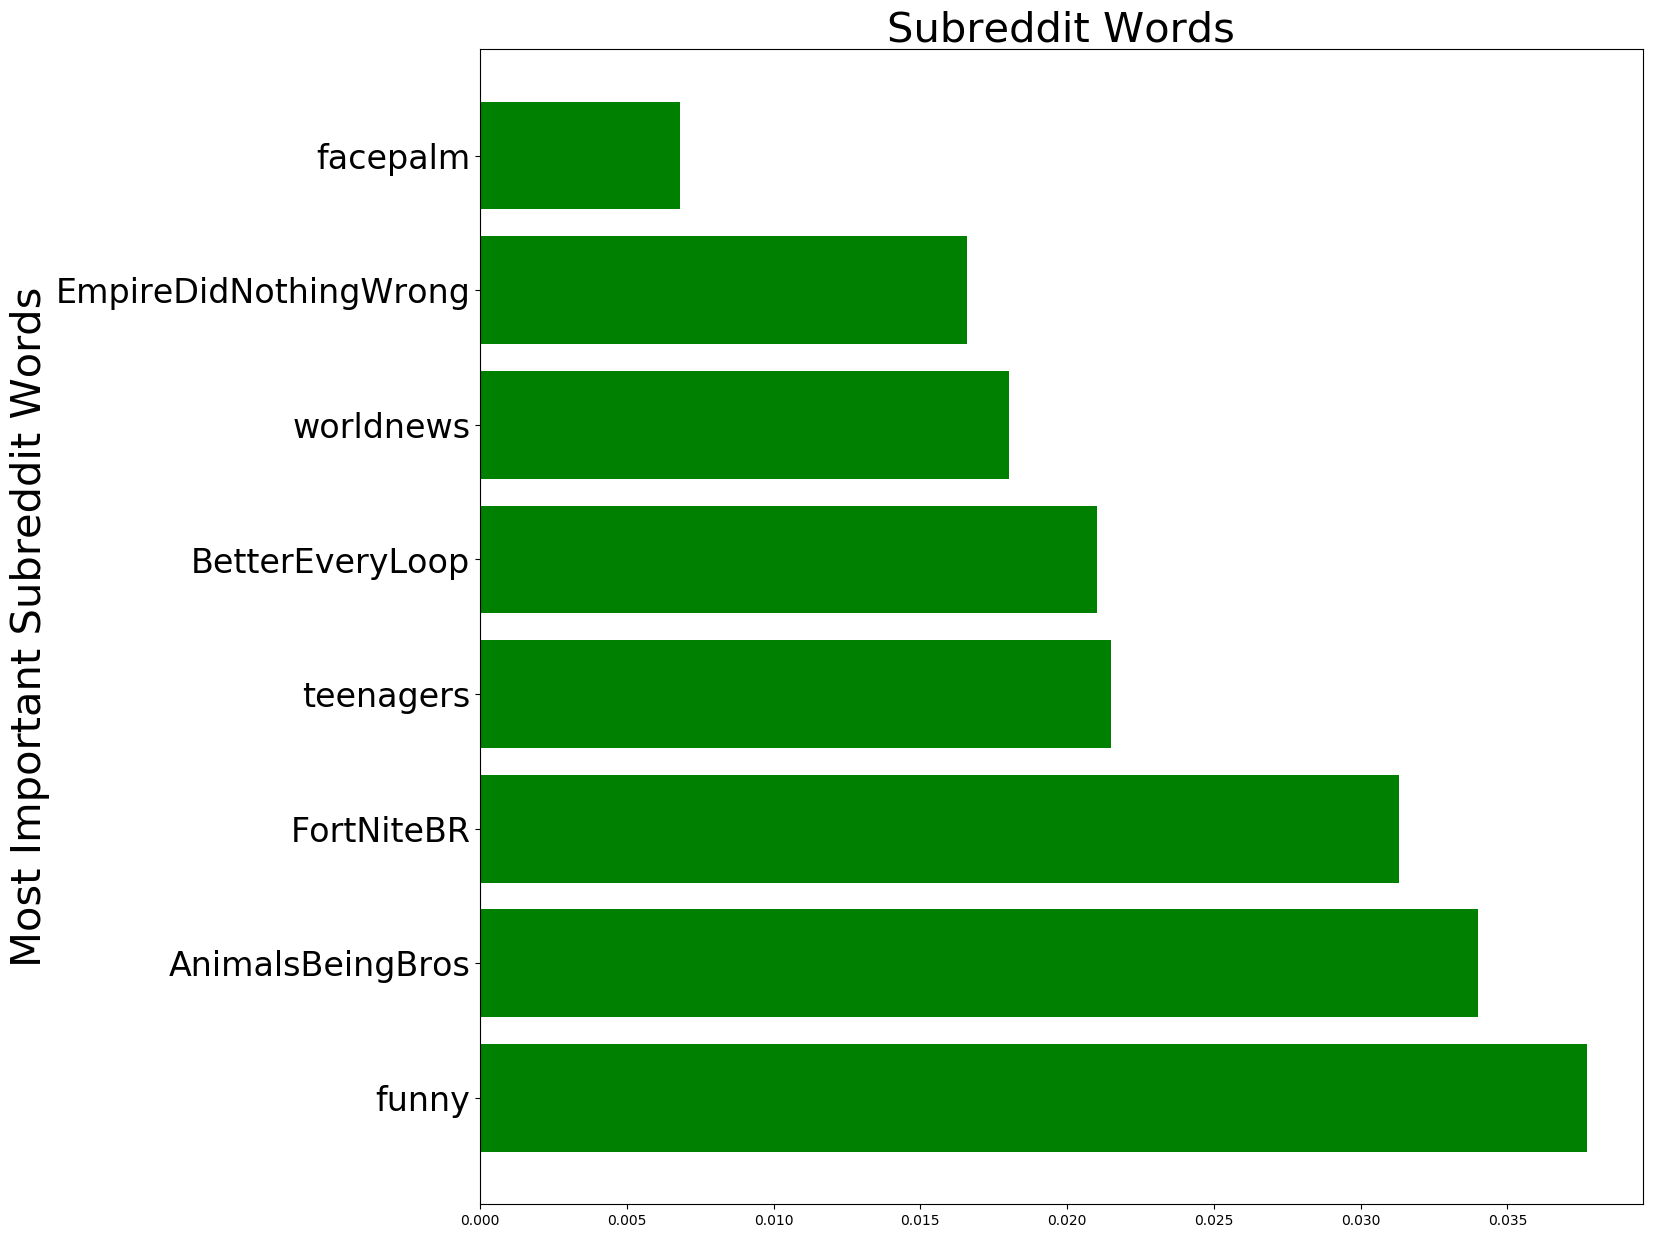

In [1482]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
#comment_freq = [ 0.0073, 0.0132, 0.0107, 0.0075, 0.00719, 0.0072,  0.00715, 0.0070]

#plt.figure(figsize=[25,25])
fig, ax = plt.subplots()
fig.set_size_inches(15,15)

plt.barh (x, comment_freq, color = 'green') #, alpha=0.5)
plt.yticks(x, ('funny', 'AnimalsBeingBros', 'FortNiteBR', 'teenagers', 'BetterEveryLoop', 'worldnews', 'EmpireDidNothingWrong', 'facepalm' ),fontsize=24)
# ax.set_ylabel('Comment Frequency')
ax.set_ylabel('Most Important Subreddit Words', fontsize=30)
ax.set_title('Subreddit Words', fontsize=30)
plt.show()

In [ ]:
'''random forest model using all the words in subreddit but this time
adjusting parameters including 100 trees, max depth of 50, using max 10 
features & balancing the weight of features for words in a subreddit
to determine which words will yield more comments'''

In [ ]:
'''Once adjusting the parameters above, we see an improvement in score.'''

In [1515]:
X = Tree_1.drop(['median'], axis=1)
y = Tree_1['median']


In [1516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [1517]:
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1518]:
rf_m = RandomForestClassifier(n_estimators=100, max_depth=50, max_features=10, class_weight='balanced')
rf_m.fit(X_train_s,y_train)
scores = cross_val_score(rf_m, X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf_m.score(X_test_s, y_test))


0.5833333333333333
0.6346153846153846


In [1472]:
zipped = list(zip(X_train, rf_m.feature_importances_))

In [1473]:
from operator import itemgetter

In [1474]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

In [1475]:
sorted_imp

[('funny', 0.03772761000771781),
 ('gaming', 0.034068879287686656),
 ('news', 0.03137450430653803),
 ('sports', 0.021566647380142308),
 ('worldnews', 0.021018111913465195),
 ('PandR', 0.018032672005245935),
 ('PrequelMemes', 0.01660433042877284),
 ('RoomPorn', 0.016294510164562733),
 ('AnimalsBeingBros', 0.014718484850652119),
 ('television', 0.014398393858467487),
 ('movies', 0.014276759909371127),
 ('nononono', 0.01352485943699281),
 ('NotMyJob', 0.013180640196801745),
 ('photoshopbattles', 0.013053449901264119),
 ('CryptoCurrency', 0.012896496513719683),
 ('HumansBeingBros', 0.012866433685170278),
 ('aww', 0.012811832572784138),
 ('MurderedByWords', 0.01251105569679812),
 ('GetMotivated', 0.01235358185402708),
 ('CringeAnarchy', 0.012291611396573289),
 ('oddlysatisfying', 0.012130244187058957),
 ('nintendo', 0.012061755203004012),
 ('ColorizedHistory', 0.012058017294896866),
 ('pics', 0.012037345812792543),
 ('science', 0.011892125312680586),
 ('AbandonedPorn', 0.011756309139697102)

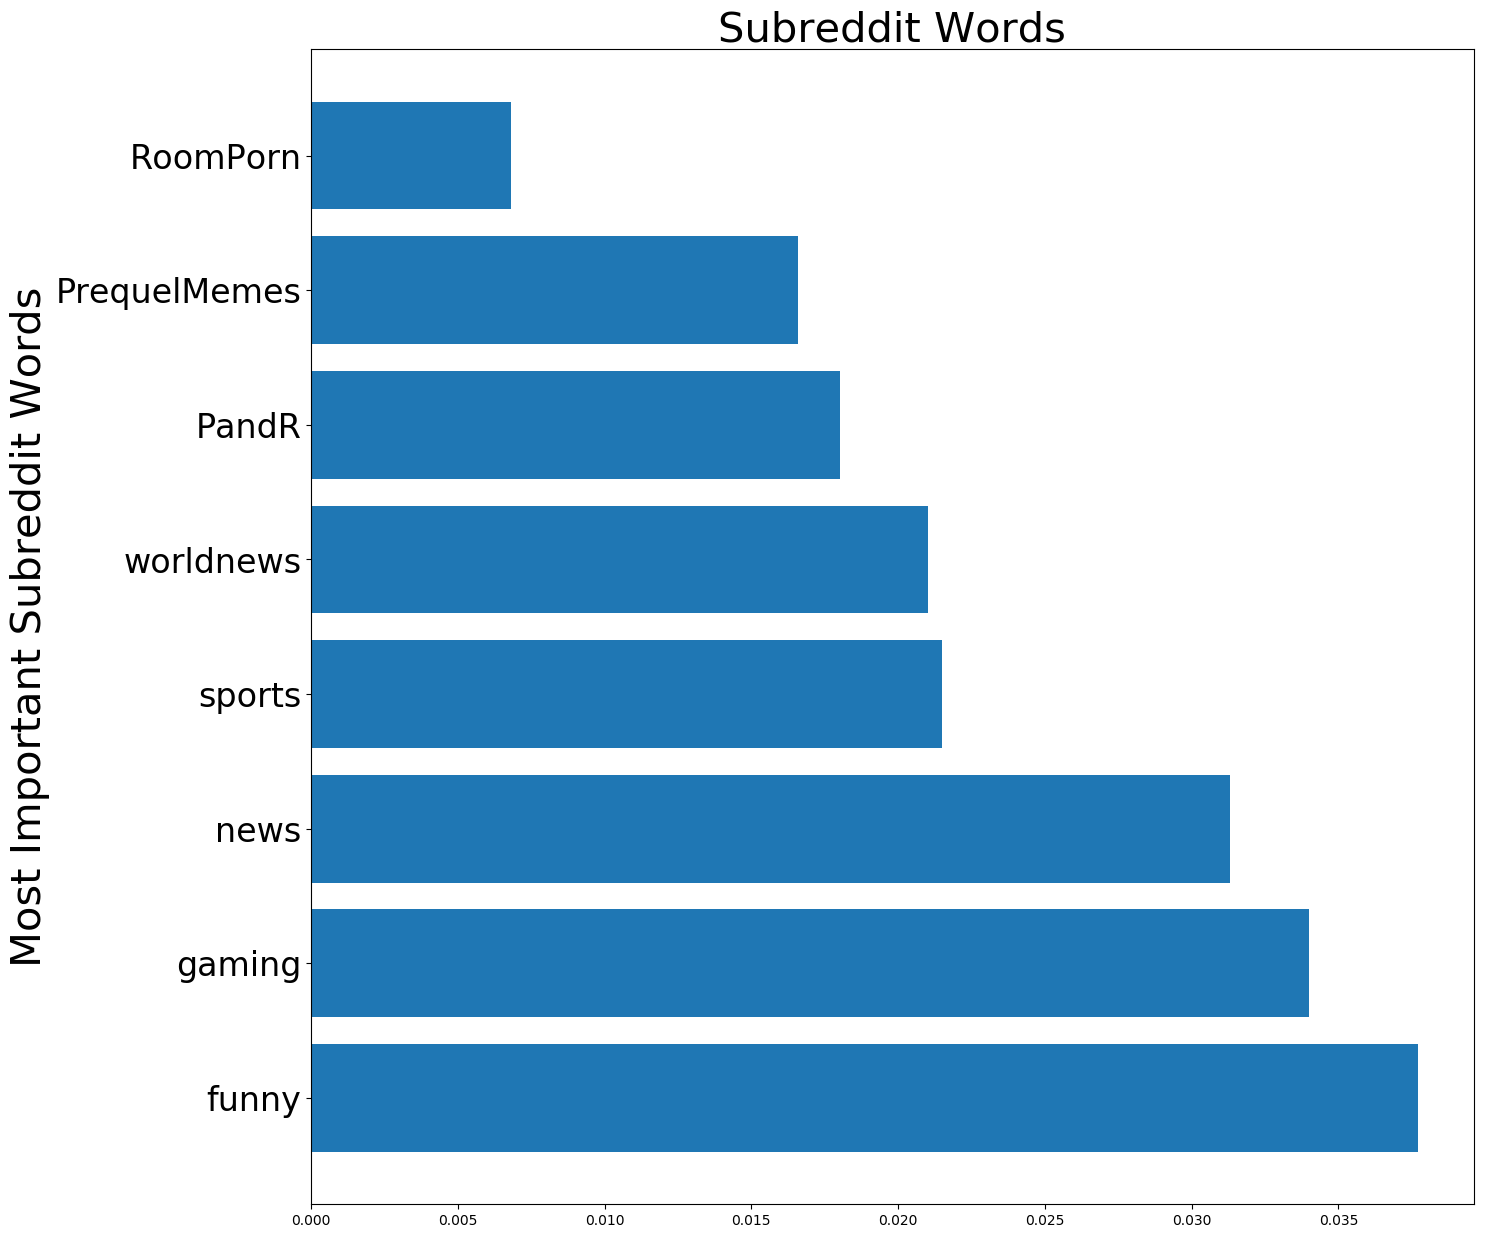

In [1485]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
comment_freq = [0.03772, 0.0340, 0.0313, 0.0215, 0.0210, 0.01803, 0.0166, 0.0068]


fig, ax = plt.subplots()

fig.set_size_inches(15,15)
plt.barh (x, comment_freq)
plt.yticks(x, ('funny', 'gaming', 'news', 'sports', 'worldnews','PandR', 'PrequelMemes', 'RoomPorn' ),fontsize=24)
#ax.set_ylabel('Comment Frequency')
ax.set_ylabel('Most Important Subreddit Words', fontsize=30)
ax.set_title('Subreddit Words', fontsize=30)
plt.show()




In [1110]:
# X_test_s = ss.fit_transform(X_test)
#X_train_s = ss.fit_transform(X_train)
#X_test_s = ss.transform(X_test)
#scores = cross_val_score(rf,X_train_s, y_train, cv=10, n_jobs=-1).mean()

#print(scores)
#print(rf.score(X_test_s, y_test))

In [ ]:
'''A model with one decision tree, not as robust as random forest, but good for 
visualization'''

In [1387]:
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3, class_weight='balanced')
classifier.fit(X_train_s, y_train)
scores= cross_val_score(classifier, X_train_s, y_train, cv=5).mean()
print(scores)
print(classifier.score(X_test_s, y_test))

0.4916666666666667
0.5769230769230769


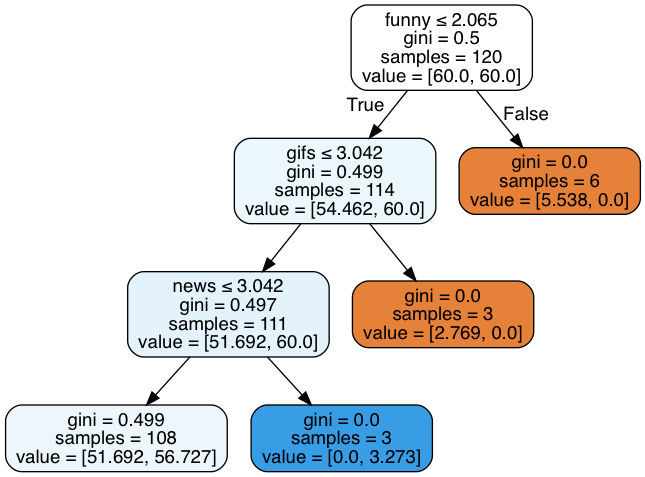

In [1388]:
dot_data = StringIO() 


export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [ ]:
'''Finding words from titles that might have some significance on number of
comments'''

In [1004]:
sub_data.Titles.str.contains(r'\bcat\b',case=False).sum()

1

In [1005]:
sub_data.Titles.str.contains(r'\bhate\b',case=False).sum()

2

In [1006]:
sub_data.Titles.str.contains(r'\bepic\b',case=False).sum()

2

In [1026]:
sub_data.Titles.str.contains(r'\bright\b',case=False).sum()

4

In [1008]:
sub_data.Titles.str.contains(r'\bmurder\b',case=False).sum()

2

In [1009]:
sub_data.Titles.str.contains(r'\bdrink\b',case=False).sum()

2

In [1010]:
sub_data.Titles.str.contains(r'\bboss\b',case=False).sum()

3

In [1011]:
sub_data.Titles.str.contains(r'\bkill\b',case=False).sum()

4

In [1012]:
sub_data.Titles.str.contains(r'\bhero\b',case=False).sum()

2

In [1013]:
sub_data.Titles.str.contains(r'\bpaint\b',case=False).sum()

4

In [1014]:
sub_data.Titles.str.contains(r'\bsuperbowl\b',case=False).sum()

1

In [1216]:
#sub_data['Cat'] = sub_data['Titles'].map(lambda x: 1 if 'cat' in x.lower() else 0)
#sub_data['Art'] = sub_data['Titles'].apply(lambda x: 1 if x=='art' else 0)
#sub_data


In [ ]:
'''countvectorizing all the words in titles'''

In [1520]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(sub_data['Titles'])
cvecdata = cvec.transform(sub_data['Titles'])
title_data  = pd.DataFrame(cvecdata.todense(),
             columns=cvec.get_feature_names())       
title_data       

036  048  100gb  115k  12  1334  1395  1426  15  1600  1711  1955  1958  \
0      0    0      0     0   0     0     0     0   0     0     0     0     0   
1      0    0      0     0   0     0     0     0   0     0     0     0     0   
2      0    0      0     0   0     0     0     0   0     0     0     0     0   
3      0    0      0     0   0     0     0     0   0     0     0     0     0   
4      0    0      0     0   0     0     0     0   0     0     0     0     0   
5      0    0      0     0   0     0     0     0   0     0     0     0     0   
6      0    0      0     0   0     0     0     0   0     0     0     0     0   
7      0    0      0     0   0     0     0     0   0     0     0     0     0   
8      0    0      0     0   0     0     0     0   0     0     0     0     0   
9      0    0      0     0   0     0     0     1   0     0     0     0     0   
10     0    0      0     0   0     0     0     0   0     0     0     0     0   
11     0    0      0     0   0     0     0     0   0     0     0     0     0   
12     0    0      0     0   0     0     0     0   0     0     0     0     0   
13     0    0      0     0   0     0     0     0   0     0     0     0     0   
14     0    0      0     0   0     0     0     0   0     0     0     0     0   
15     0    0      0     0   0     0     0     0   0     0     0     0     0   
16     0    0      0     0   0     0     0     0   0     0     0     0     0   
17     0    0      0     0   0     0     0     0   0     0     0     0     0   
18     0    0      0     0   0     0     0     0   0     0     0     0     0   
19     0    0      0     0   0     0     0     0   0     0     0     0     0   
20     0    0      0     0   0     0     0     0   0     0     0     0     0   
21     0    0      0     0   0     0     0     0   0     0     0     0     0   
22     0    0      0     0   0     0     0     0   0     1     0     0     0   
23     0    0      0     0   0     0     0     0   0     0     0     0     0   
24     0    0      0     0   0     0     0     0   0     0     0     0     0   
25     0    0      0     0   0     0     0     0   0     0     0     0     0   
26     0    0      0     0   0     0     0     0   0     0     0     0     0   
27     0    0      0     0   0     0     0     0   0     0     0     0     0   
28     0    0      0     0   0     0     0     0   0     0     0     0     0   
29     0    0      0     0   0     0     0     0   0     0     0     0     0   
..   ...  ...    ...   ...  ..   ...   ...   ...  ..   ...   ...   ...   ...   
142    0    0      0     0   0     0     0     0   0     0     0     0     0   
143    0    0      0     0   0     0     0     0   0     0     0     0     0   
144    0    0      0     0   0     0     0     0   0     0     0     0     0   
145    0    0      0     0   0     0     0     0   0     0     0     0     0   
146    0    0      0     0   0     0     0     0   0     0     0     0     0   
147    0    0      0     0   0     0     0     0   0     0     0     0     0   
148    0    0      0     0   0     0     0     0   0     0     0     0     0   
149    0    0      0     0   0     0     0     0   0     0     0     0     0   
150    0    0      0     0   0     0     0     0   0     0     0     0     0   
151    0    0      0     0   0     0     0     0   0     0     0     0     0   
152    0    0      0     0   0     0     0     0   0     0     0     0     0   
153    0    0      0     0   0     0     0     0   0     0     0     0     0   
154    0    0      0     0   0     0     0     0   0     0     0     0     0   
155    0    0      0     0   0     0     0     0   0     0     0     0     0   
156    1    1      0     0   0     0     0     0   0     0     0     0     0   
157    0    0      0     0   0     0     0     0   0     0     0     0     0   
158    0    0      0     0   1     0     0     0   0     0     0     0     0   
159    0    0      0     0   0     0     0     0   0     0     0     0     0   
160  

In [1521]:
'''Creating a table with all subreddits words AND all words in titles'''

'Creating a table with all subreddits words AND all words in titles'

In [1522]:
sub_title = pd.concat([Tree_1,title_data], axis=1)
sub_title

median  2healthbars  2meirl4meirl  ANormalDayInRussia  AbandonedPorn  \
0         1            0             0                   0              0   
1         1            0             0                   0              0   
2         1            0             0                   0              0   
3         1            0             0                   0              0   
4         1            0             0                   0              0   
5         1            0             0                   0              0   
6         1            0             0                   0              0   
7         1            0             0                   0              0   
8         1            0             0                   0              0   
9         1            0             0                   0              1   
10        1            0             0                   0              0   
11        1            0             0                   0              0   
12        1            0             0                   0              0   
13        1            0             0                   0              0   
14        1            0             0                   0              0   
15        1            0             0                   0              0   
16        0            0             0                   0              0   
17        1            0             0                   0              0   
18        0            0             0                   0              0   
19        1            0             0                   0              0   
20        1            0             0                   0              0   
21        1            0             0                   0              0   
22        1            0             0                   0              0   
23        1            0             0                   0              0   
24        1            0             0                   0              0   
25        1            0             0                   0              0   
26        1            0             0                   0              0   
27        0            0             0                   0              0   
28        0            0             0                   0              0   
29        1            0             0                   0              0   
..      ...          ...           ...                 ...            ...   
142       0            0             0                   0              0   
143       0            0             0                   0              0   
144       1            0             0                   0              0   
145       0            0             0                   0              0   
146       0            0             0                   0              0   
147       0            0             0                   0              0   
148       1            0             0                   0              0   
149       0            0             0                   0              0   
150       0            0             0                   0              0   
151       1            0             0                   0              0   
152       1            0             0                   0              0   
153       0            0             0                   0              0   
154       1            0             0                   0              0   
155       1            0             0                   0              0   
156       0            0             0                   0              0   
157       0            0             0                   0              0   
158       1            0             0                   0              0   
159       0            0             0                   0              0   
160       1            0             0                   0              0   
161       0            0             0                   0              0   
1

In [1523]:
'''Pulling out 2 words from the titles to see if they 
have a significant effect on comments (above median) '''

'Pulling out 2 words from the titles to see if they \nhave a significant effect on comments (above median) '

In [ ]:
'''These words do not seem to have any affect on comments as they score
slightly under the baseline'''

In [1391]:
X = sub_title[['paint', 'kill']] 
y = sub_title['median']

In [1392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)


In [1393]:
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1394]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_s,y_train)
scores = cross_val_score(rf1, X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf1.score(X_test_s, y_test))

0.49979153637690227
0.5384615384615384


In [ ]:
'''A second attempt created with different features, again not a significant 
effect on number of comments'''

In [1395]:
X = sub_title[['hero', 'boss', 'superbowl', 'epic']] 
y = sub_title['median']

In [1396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)


In [1397]:
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1398]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_s,y_train)
scores = cross_val_score(rf2, X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf2.score(X_test_s, y_test))

0.541682301438399
0.40384615384615385


In [ ]:
'''Same model random forest using the same features but with different 
parameters, still yields a much better score'''

In [1399]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
rf3.fit(X_train_s,y_train)
scores = cross_val_score(rf3, X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf3.score(X_test_s, y_test))

0.5335522201375861
0.5961538461538461


In [ ]:
'''Now creating a model that uses ALL words in the subreddits and titles'''

In [1535]:
sub_title = pd.concat([Tree_1,title_data], axis=1)
sub_title.head()

median  2healthbars  2meirl4meirl  ANormalDayInRussia  AbandonedPorn  \
0       1            0             0                   0              0   
1       1            0             0                   0              0   
2       1            0             0                   0              0   
3       1            0             0                   0              0   
4       1            0             0                   0              0   

   AccidentalWesAnderson  AnimalsBeingBros  AnimalsBeingJerks  Art  AskReddit  \
0                      0                 0                  0    0          0   
1                      0                 0                  0    0          0   
2                      0                 0                  0    0          0   
3                      0                 0                  0    0          0   
4                      0                 0                  0    0          0   

   BeAmazed  BetterEveryLoop  BikiniBottomTwitter  BlackPeopleTwitter  \
0         0                0                    0                   0   
1         0                0                    0                   0   
2         0                0                    0                   0   
3         0                0                    0                   0   
4         0                0                    0                   0   

   BlueMidterm2018  Bossfight  ColorizedHistory  ComedyCemetery  CozyPlaces  \
0                0          0                 0               0           0   
1                0          0                 0               0           0   
2                0          0                 0               0           0   
3                0          0                 0               0           0   
4                0          0                 0               0           0   

   CrazyIdeas  CringeAnarchy  CryptoCurrency  Damnthatsinteresting  EarthPorn  \
0           0              0               0                     0          0   
1           0              0               0                     0          0   
2           0              0               0                     0          0   
3           0              0               0                     0          0   
4           0              0               0                     0          0   

   EmpireDidNothingWrong  Eyebleach  FellowKids  FoodPorn  FortNiteBR  \
0                      0          0           0         0           0   
1                      0          0           0         0           0   
2                      0          0           0         0           0   
3                      0          0           0         0           0   
4                      0          0           0         0           0   

   FunnyandSad  Futurology  GetMotivated  HighQualityGifs  HistoryPorn  \
0            0           0             0                0            0   
1            0           0             0                0            0   
2            0           0             0                0            0   
3            0           0             0                0            0   
4            0           0             0                0            0   

   HumansBeingBros  IASIP  IAmA  Idubbbz  Jokes  Justfuckmyshitup  \
0                0      0     0        0      0                 0   
1                0      0     0        0      0                 0   
2                0      0     0        0      0                 0   
3                0      0     0        0      0                 0   
4                0      0     0        0      0                 0   

   JusticeServed  MEOW_IRL  MadeMeSmile  MaliciousCompliance  MapPorn  \
0              0         0            0                    0        0   
1              0         0            0                    0        0   
2              0         0            0                    0        0   
3              0         0            0                    0        0   


In [1548]:
X = sub_title.drop(['median'], axis=1)
y = sub_title['median']
len(X.columns)

924

In [1549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [1550]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1551]:
rf4 = RandomForestClassifier()
rf4.fit(X_train_s,y_train)
scores = cross_val_score(rf4,X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf4.score(X_test_s, y_test))

0.515848446946008
0.5384615384615384


'''Again tweaking with the parameters to see if we can get even better
results, but in this case tuning the features, depth, # of trees and balancing weights
didnt yield any difference and even scored slightly worse'''

In [1552]:
rf5 = RandomForestClassifier(max_features=5)
rf5.fit(X_train_s,y_train)
scores = cross_val_score(rf5,X_train_s, y_train, cv=cv, n_jobs=-1).mean()
print(scores)
print(rf5.score(X_test_s, y_test))

0.4664582030435689
0.5


In [1405]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Repeating with a Logistic Regression Model.

In [1406]:
X = sub_title.drop(['median'], axis=1)
y = (sub_title['median']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [1407]:
logreg = LogisticRegression()
logreg.fit(X_train_s,  y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
'''Seems like the test set scores poorly probably due to the fact that 
so many features were used there was likely overfitting, better to go with
a random forest model that can tune this a bit more'''

In [1408]:
scores= cross_val_score(logreg, X_train_s, y_train, cv=5)
print(scores.mean())
print(logreg.score(X_test_s, y_test))


0.5883333333333333
0.5769230769230769


In [ ]:
'''Reducing the number of features to using only the most important features
did only mildly better, but definitely less overfitting'''

In [1557]:
X = sub_title[['funny', 'gaming', 'news', 'sports']]
y = (sub_title['median']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_s,  y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1558]:
scores= cross_val_score(logreg, X_train_s, y_train, cv=5)
print(scores.mean())
print(logreg.score(X_test_s, y_test))

0.5083333333333333
0.4807692307692308


In [ ]:
'''Looking for most important words out of ALL the words in the 
subreddits and titles'''

In [1411]:
len(rf4.feature_importances_)

924

In [1412]:
zipped = list(zip(X_train, rf4.feature_importances_))

In [1413]:
from operator import itemgetter

In [1492]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

sorted_imp = pd.DataFrame(sorted_imp)
sorted_imp.rename(columns={0:'word', 1:'importance'}, inplace=True)
sorted_imp.head()

word  importance
0      funny    0.037728
1     gaming    0.034069
2       news    0.031375
3     sports    0.021567
4  worldnews    0.021018

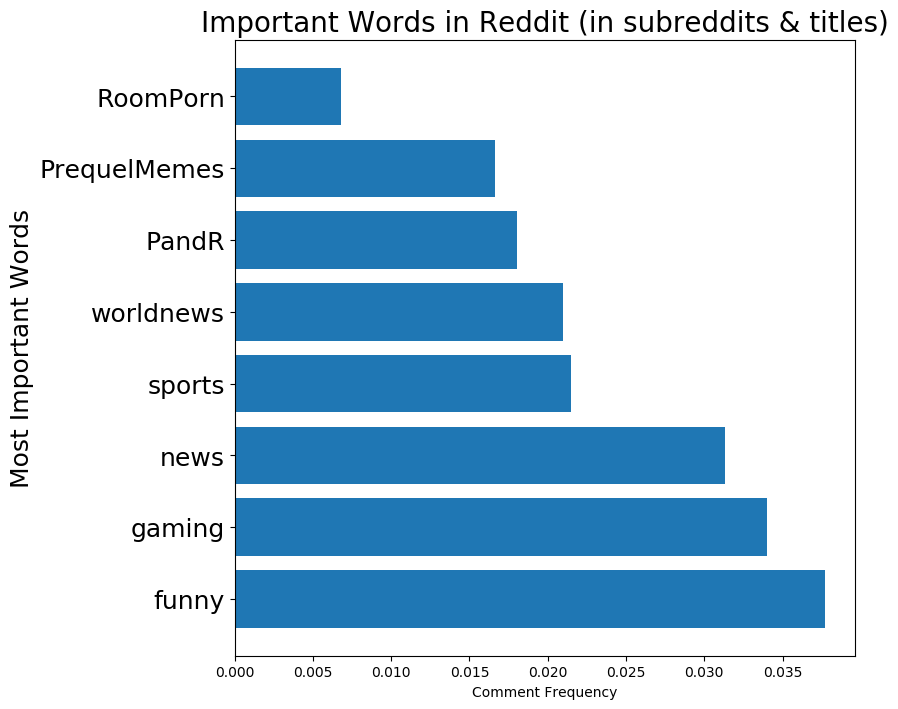

In [1503]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
# comment_freq = [0.0453, 0.0385, 0.0181, 0.01809, 0.0168, 0.0161, 0.0156, 0.0146]


fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.barh (x, comment_freq)
plt.yticks(x, sorted_imp['word'][0:9],fontsize=18)
ax.set_xlabel('Comment Frequency')
ax.set_ylabel('Most Important Words', fontsize=18)
ax.set_title('Important Words in Reddit (in subreddits & titles)', fontsize=20)
plt.show()

In [ ]:
'''most important words in subreddits that affect comments'''

In [1417]:
zipped = list(zip(X_train, rf.feature_importances_))

In [1418]:
from operator import itemgetter

In [1419]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

In [1420]:
sorted_imp

[('luigi', 0.016672372659109314),
 ('local', 0.011350054835085655),
 ('james', 0.004741195278871631),
 ('apparent', 0.0026317008127332703)]

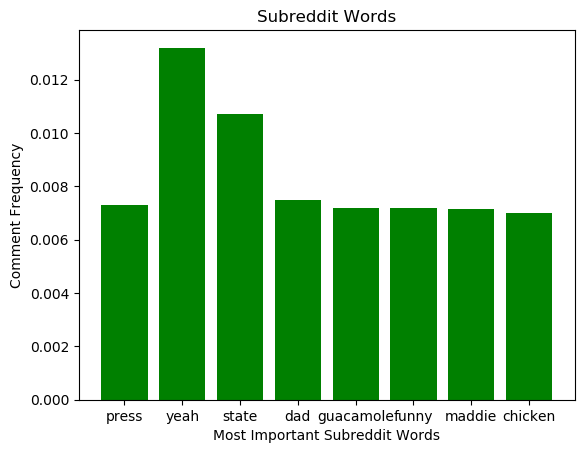

In [1421]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
comment_freq = [ 0.0073, 0.0132, 0.0107, 0.0075, 0.00719, 0.0072,  0.00715, 0.0070]


fig, ax = plt.subplots()
plt.bar (x, comment_freq, color = 'green') #, alpha=0.5)
plt.xticks(x, ('press', 'yeah', 'state', 'dad','guacamole', 'funny', 'maddie', 'chicken' ))
ax.set_ylabel('Comment Frequency')
ax.set_xlabel('Most Important Subreddit Words')
ax.set_title('Subreddit Words')
plt.show()

In [ ]:
'''more accurately tuned model with most important words in subreddits 
that affect comments'''

In [1422]:
zipped = list(zip(X_train, rf_m.feature_importances_))

In [1423]:
from operator import itemgetter

In [1424]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

In [1425]:
sorted_imp

[('local', 0.011884014641245843),
 ('luigi', 0.009372895118484515),
 ('james', 0.007562764937481115),
 ('apparent', 0.0070198594397686085)]

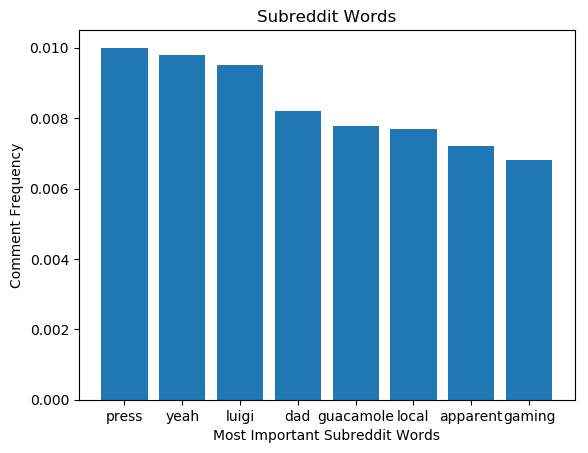

In [1426]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
comment_freq = [0.0100, 0.0098, 0.0095, 0.0082, 0.00779, 0.00770, 0.0072, 0.0068]


fig, ax = plt.subplots()
plt.bar (x, comment_freq)
plt.xticks(x, ('press', 'yeah', 'luigi', 'dad', 'guacamole','local', 'apparent', 'gaming' ))
ax.set_ylabel('Comment Frequency')
ax.set_xlabel('Most Important Subreddit Words')
ax.set_title('Subreddit Words')
plt.show()



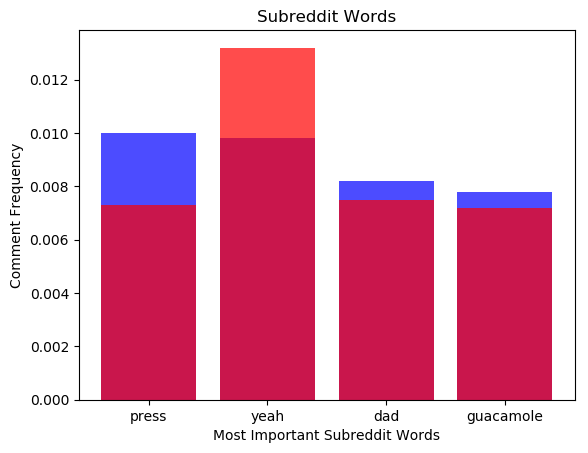

In [1427]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money1 = [0.0100, 0.0098,  0.0082, 0.00779]
money2 = [ 0.0073, 0.0132,  0.0075, 0.00719]



fig, ax = plt.subplots()
plt.bar (x, money1,color = 'blue', alpha=0.7 )
plt.xticks(x, ('press', 'yeah',  'dad', 'guacamole'))
plt.bar (x, money2, color = 'red', alpha=0.7)
plt.xticks(x, ('press', 'yeah', 'dad','guacamole' ))
ax.set_ylabel('Comment Frequency')
ax.set_xlabel('Most Important Subreddit Words')
ax.set_title('Subreddit Words')
plt.show()



In [1349]:
importances = rf4.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [1227]:
len(rf2.feature_importances_)

4

In [1224]:
X_train.shape

(120, 924)

In [864]:
zipped = list(zip(X_train, rf2.feature_importances_))

In [863]:
from operator import itemgetter

In [865]:
sorted_imp = sorted(zipped, key=itemgetter(1), reverse=True)

In [866]:
sorted_imp

[('are', 0.025661039827057853),
 ('how', 0.021404254145187776),
 ('you', 0.020688900247778752),
 ('meirl', 0.01919294221500825),
 ('this', 0.016759782109591375),
 ('funny', 0.014480144617591811),
 ('in', 0.014281791692080737),
 ('backend', 0.013992941724274635),
 ('AnimalsBeingJerks', 0.013694989391130938),
 ('art', 0.012732290119825341),
 ('over', 0.012492813089435627),
 ('news', 0.011715197879625638),
 ('wholesomememes', 0.011581951909749786),
 ('sandwichimage', 0.0099436857783053),
 ('it', 0.009828910438879757),
 ('never', 0.009607418401062924),
 ('cooper', 0.00903970370085804),
 ('NotMyJob', 0.008935201586969763),
 ('that', 0.008889615135323731),
 ('easter', 0.008750843387842667),
 ('alexa', 0.008441651898548343),
 ('and', 0.008355819747898926),
 ('for', 0.008301221882909845),
 ('than', 0.008120915774010504),
 ('of', 0.007700464875572609),
 ('damn', 0.007676025153630968),
 ('on', 0.007540363828664386),
 ('Trumpgret', 0.0073906485671191525),
 ('ever', 0.00729096422191051),
 ('why', 

In [854]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec.fit(X, y)
df  = pd.DataFrame(tvec.transform(X, y).todense(),
                   columns=tvec.get_feature_names())
df

036  048  100gb  115k   12  1334  1395  1426   15  1600   ...     yeah  \
0     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
2     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
3     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
4     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
5     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
6     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
7     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
8     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
9     0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
10    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
11    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
12    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
13    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
14    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
15    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
16    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
17    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
18    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
19    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
20    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
21    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
22    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
23    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
24    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
25    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
26    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
27    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
28    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
29    0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
...   ...  ...    ...   ...  ...   ...   ...   ...  ...   ...   ...      ...   
1013  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1014  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1015  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1016  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1017  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1018  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1019  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1020  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1021  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1022  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1023  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1024  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1025  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1026  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1027  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1028  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1029  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1030  0.0  0.0    0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   ...      0.0   
1031  

# Executive Summary

Reddit bridges communities and individuals with ideas, the latest digital trends, and breaking news. It is comprised of 3 important categories, “share”, “vote” and “discuss.”  Anyone can share their ideas and post them. Voters then vote up or down the posts whereby the most interesting posts rise to the top. Readers then can comment on these posts which usually prove to be the most exciting part as they are a breeding ground for heated discussions and humorous responses.

As these comments provide much of the guts of the reddit website, we set out to find if there are particular words that contribute to whether a post will have a lot of comments.

We went about achieving this task by web scraping post titles and their subreddits, and pulling out all the words, in order to find if any words are indicative of a post with more comments than the median. 

After testing all the individual words in both the titles and subreddits of 172 posts, it was determined that while some words are associated with more  comments, it didn’t seem to significantly impact the number of comments.

 In the end, it seems that the perhaps actual content of a post is a better indicator than specific words in that post.